In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load your dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Locked\02. Data Science\08. Data Science 3MTT Files\Module 5\marketing_AB.csv')  

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
df.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [17]:
ad_group = df[df['test group'] == 'ad']
print(ad_group)

        Unnamed: 0  user id test group  converted  total ads most ads day  \
0                0  1069124         ad      False        130       Monday   
1                1  1119715         ad      False         93      Tuesday   
2                2  1144181         ad      False         21      Tuesday   
3                3  1435133         ad      False        355      Tuesday   
4                4  1015700         ad      False        276       Friday   
...            ...      ...        ...        ...        ...          ...   
588096      588096  1278437         ad      False          1      Tuesday   
588097      588097  1327975         ad      False          1      Tuesday   
588098      588098  1038442         ad      False          3      Tuesday   
588099      588099  1496395         ad      False          1      Tuesday   
588100      588100  1237779         ad      False          1      Tuesday   

        most ads hour  
0                  20  
1                  22  
2  

In [5]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
    
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicates: {duplicates}")
if duplicates > 0:
        df = df.drop_duplicates()
        print(f"Removed {duplicates} duplicates")
    
# Validate column data types
print("\nData types:")
print(df.dtypes)


Missing values per column:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Number of duplicates: 0

Data types:
Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object


In [6]:
# Clean and standardize group column if needed
if 'group' in df.columns:
        df['group'] = df['group'].str.lower().str.strip()
        print("\nGroup values after standardization:")
        print(df['group'].value_counts())

In [7]:
# Convert date column if exists
if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df['day_of_week'] = df['date'].dt.day_name()
        df['hour'] = df['date'].dt.hour

In [8]:
# Exploratory Data Analysis
print("\n=== Exploratory Data Analysis ===")
print("\nBasic statistics:")
print(df.describe())


=== Exploratory Data Analysis ===

Basic statistics:
          Unnamed: 0       user id      total ads  most ads hour
count  588101.000000  5.881010e+05  588101.000000  588101.000000
mean   294050.000000  1.310692e+06      24.820876      14.469061
std    169770.279667  2.022260e+05      43.715181       4.834634
min         0.000000  9.000000e+05       1.000000       0.000000
25%    147025.000000  1.143190e+06       4.000000      11.000000
50%    294050.000000  1.313725e+06      13.000000      14.000000
75%    441075.000000  1.484088e+06      27.000000      18.000000
max    588100.000000  1.654483e+06    2065.000000      23.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_26056\914103865.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='test group', y='converted', data=df, ci=None)


Text(0, 0.5, 'Conversion Rate')

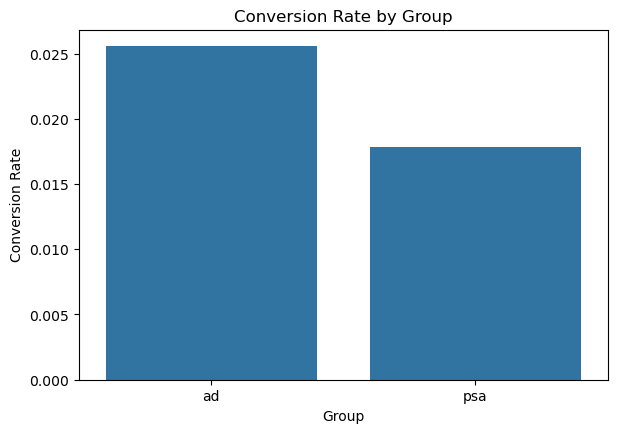

In [10]:
# Visualize data distributions
plt.figure(figsize=(15, 10))
# Conversion rate by group
plt.subplot(2, 2, 1)
sns.barplot(x='test group', y='converted', data=df, ci=None)
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')

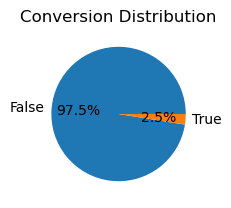

In [11]:
# Distribution of conversions
plt.subplot(2, 2, 2)
df['converted'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Conversion Distribution')
plt.ylabel('')

# Relationship between Total Ads and conversions
if 'total_ads' in df.columns:
    plt.subplot(2, 2, 3)
    sns.boxplot(x='converted', y='total_ads', data=df)
    plt.title('Total Ads Viewed vs Conversion')
    plt.xlabel('Converted')
    plt.ylabel('Total Ads Viewed')

In [12]:
# Conversion by day of week if date available
if 'day_of_week' in df.columns:
    plt.subplot(2, 2, 4)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.barplot(x='day_of_week', y='converted', data=df, order=day_order, ci=None)
    plt.title('Conversion Rate by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Conversion Rate')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [18]:
psa_group = df[df['test group'] == 'psa']
print(psa_group)

        Unnamed: 0  user id test group  converted  total ads most ads day  \
18              18   900681        psa      False        248     Saturday   
38              38   905704        psa      False         27     Thursday   
68              68   904595        psa      False         13      Tuesday   
140            140   901904        psa      False         32    Wednesday   
157            157   902234        psa      False        105      Tuesday   
...            ...      ...        ...        ...        ...          ...   
588052      588052   900959        psa      False         16      Tuesday   
588063      588063   902828        psa      False          3      Tuesday   
588066      588066   914578        psa      False          1      Tuesday   
588069      588069   909042        psa      False          6      Tuesday   
588081      588081   904721        psa      False         16      Tuesday   

        most ads hour  
18                 19  
38                  8  
68 

In [12]:
# Calculate conversion rates
ad_conversion_rate = ad_group['converted'].mean()
psa_conversion_rate = psa_group['converted'].mean()

print(f'Ad Group Conversion Rate: {ad_conversion_rate}')
print(f'PSA Group Conversion Rate: {psa_conversion_rate}')

Ad Group Conversion Rate: 0.025546559636683747
PSA Group Conversion Rate: 0.01785410644448223


In [13]:
# Estimate potential revenue
# Assuming a fixed revenue per conversion
revenue_per_conversion = 100  # Example value
ad_revenue = ad_group['converted'].sum() * revenue_per_conversion
psa_revenue = psa_group['converted'].sum() * revenue_per_conversion

print(f'Estimated Revenue from Ads: ${ad_revenue}')
print(f'Estimated Revenue from PSA: ${psa_revenue}')

Estimated Revenue from Ads: $1442300
Estimated Revenue from PSA: $42000


In [14]:
# A/B Testing: Statistical significance testing
# Let Perform a two-proportion Z-test
n_ad = len(ad_group)
n_psa = len(psa_group)
p1 = ad_conversion_rate
p2 = psa_conversion_rate

In [15]:
# we now Calculate standard error
se = np.sqrt((p1 * (1 - p1) / n_ad) + (p2 * (1 - p2) / n_psa))
# Calculate Z score
z = (p1 - p2) / se
# Calculate p-value
p_value = stats.norm.sf(abs(z)) * 2  # Two-tailed test
print(f'Z-score: {z}')
print(f'P-value: {p_value}')

Z-score: 8.657336478930569
P-value: 4.8291558567227926e-18


In [16]:
# Assess statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis: Significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: No significant difference between groups.')

Reject the null hypothesis: Significant difference between groups.
